# Exploring Linear Regression

First aproach to linear regressions in scikit learn


In [1]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Create Synthetic Data.
This returns X training data and y labels.  

* Experiment with the **`noise`** keyword argument to see how it affects the graph below, after set `noise=20`.
* Experiment with the **`random_state`** variable to get different sets of data

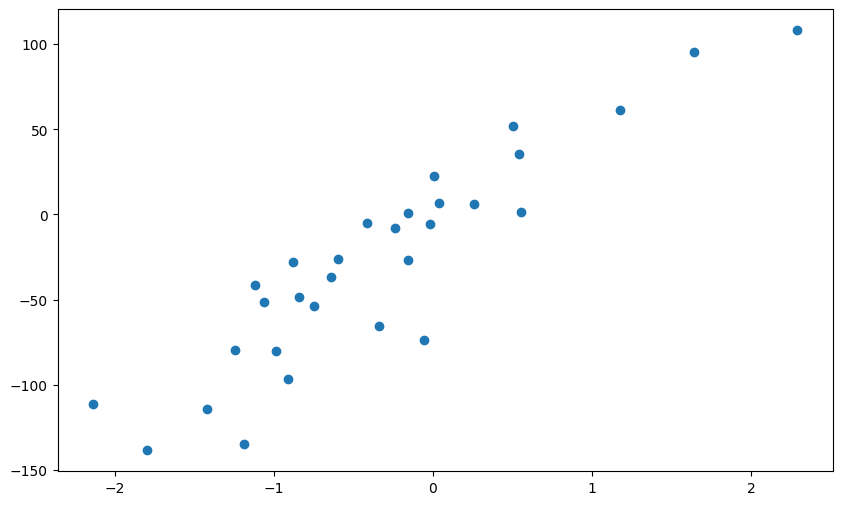

In [2]:
X, y = make_regression(n_samples=30, n_features=1, noise = 20.0, random_state = 2)
plt.figure(figsize=(10,6))
plt.scatter(X, y);

In [3]:
#We will create some points between the Xmin and Xmax to tplot the line for the regression
linspace_data = np.linspace(min(X),max(X),100)

In [4]:
# We create a function to plot the line and to scatter the points we already created to see how the line approaches to the scatter points.
#For the mean_squared_error we will compare our predictions based on the Linear regression with the real points.

def plot_your_guess (m , c):
    line_data = m * linspace_data +c
    y_pred = m * X + c

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(linspace_data, line_data, color = 'teal')
    plt.title(f"mean squared error: {mean_squared_error(y_pred,y):.3f}");  

# Let's plot our own personal guess for the best line

We can choose some values for the slope 'm' and independent term 'c' (intercept term) for the linear regression, including checking its mean squared error.
Lets give it a try before checking it with 'LinearRegression module inside scikit-learn.


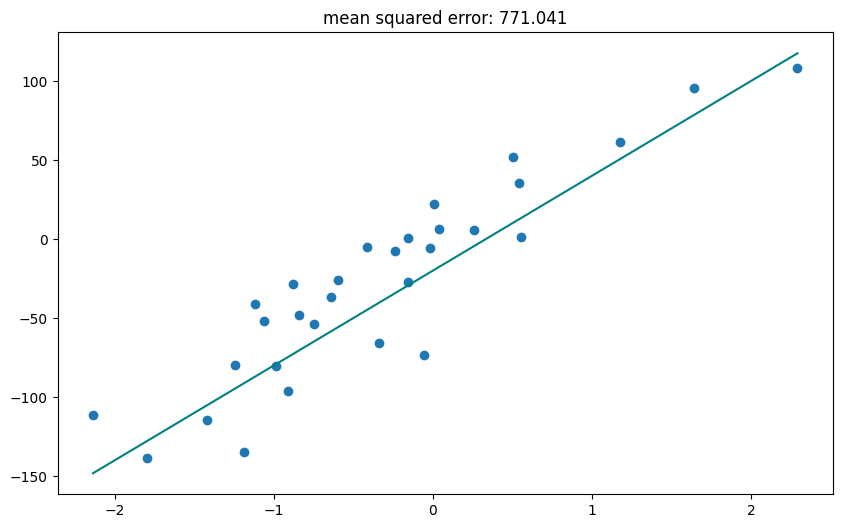

In [5]:
# try some random values
plot_your_guess(m = 60 , c = -20 )

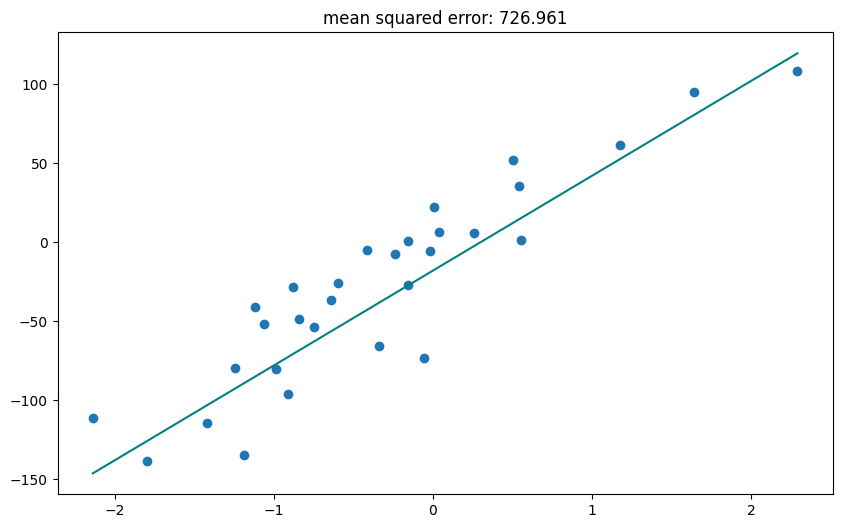

In [6]:
# try some random values
plot_your_guess(m = 60 , c = -18 )

# Linear Regression
Ok, now we'll let the computer "learn" for itself what the best line is.
We'll use the `LinearRegression` model from scikit-learn to do this.

LinearRegression will automatically find the coefficients and intercept terms that best fit the data point.  It will reduce the error as much as possible.

Let's create a linear regression model and fit it to our dataset.

In [7]:
from sklearn.linear_model import LinearRegression

def plot_linear():
    model = LinearRegression()
    model.fit(X,y)
    print (f"M :  {model.coef_}, C : {model.intercept_}")
    y_line_data = model.predict(linspace_data)

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(linspace_data, y_line_data)
    plt.title(f"mean squared error: {mean_squared_error(model.predict(X), y):.2f}")

M :  [59.15592131], C : -8.259243452985107


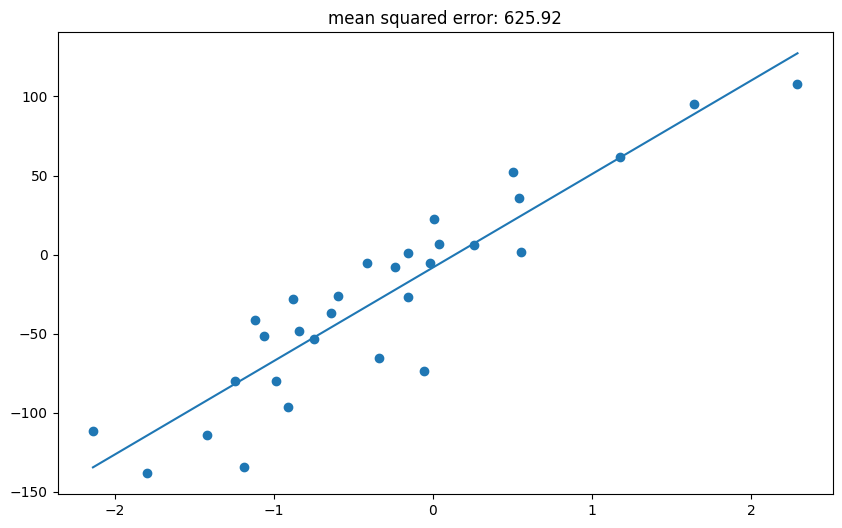

In [8]:
plot_linear()

As we can see the function "LinearRegression " its minimizing the error and showing us the line that best suits the points.
In order t do that we should do the derivative of the cost function to minimize the error.

# Polynomial Regression

We will try now check the adjust of a polynomial curve to the data.
We will compare with different degrees of th epolynomial curve.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(degree = 3):
    # make a pipeline that creates the polynomial features based on our input data
    # this is akin to using performing polynomial regression
    # see http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X,y)
    y_line_data = model.predict(linspace_data)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(linspace_data, y_line_data, color = 'teal')
    plt.title(f"mean squared error: {mean_squared_error(model.predict(X), y):.3f}")
    plt.ylim((min(y)-10,max(y)+10))


### Try adjusting the degree of the polynomial regression.


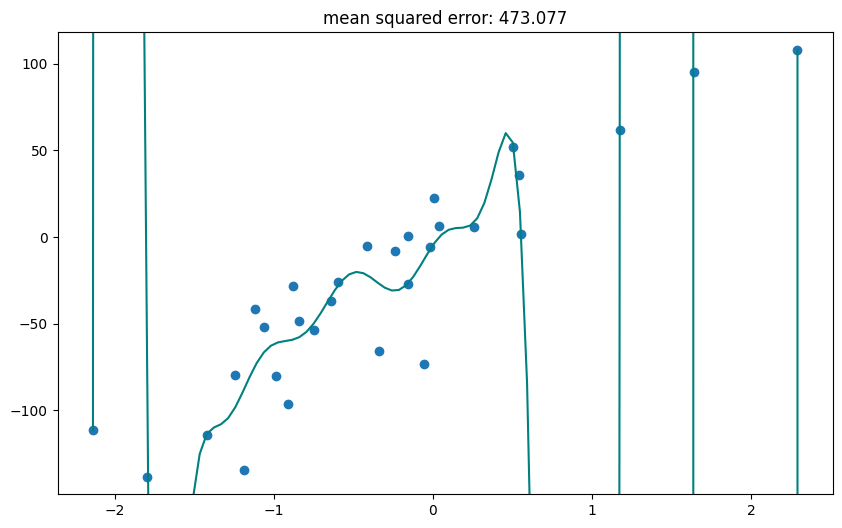

In [10]:
plot_poly(degree = 15)

We have overfitting in the model. The dregrees of the polynomial are so big that the function its dumping and getting all the noise from teh data.
This curve its not representative of the data

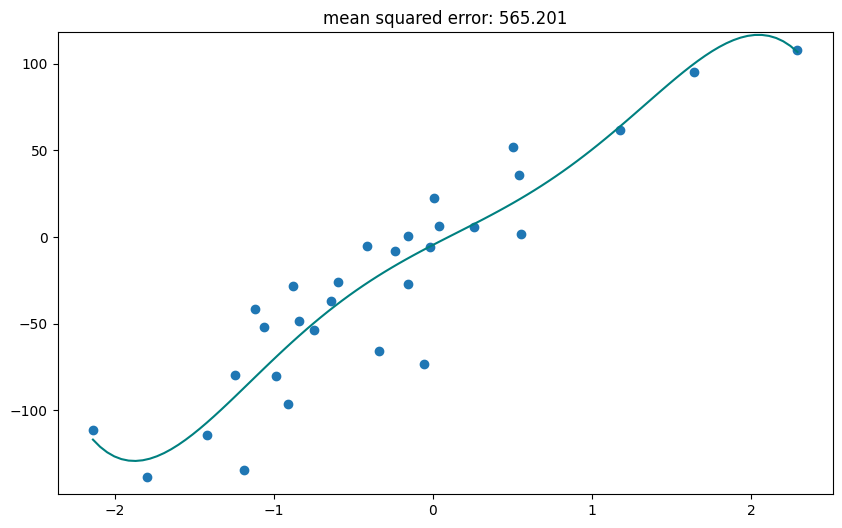

In [11]:
plot_poly(degree =5 )

The model has improved comparing to 15 degrees but still is overfitting specially at the beginning and end.
Better to reduce a bit more

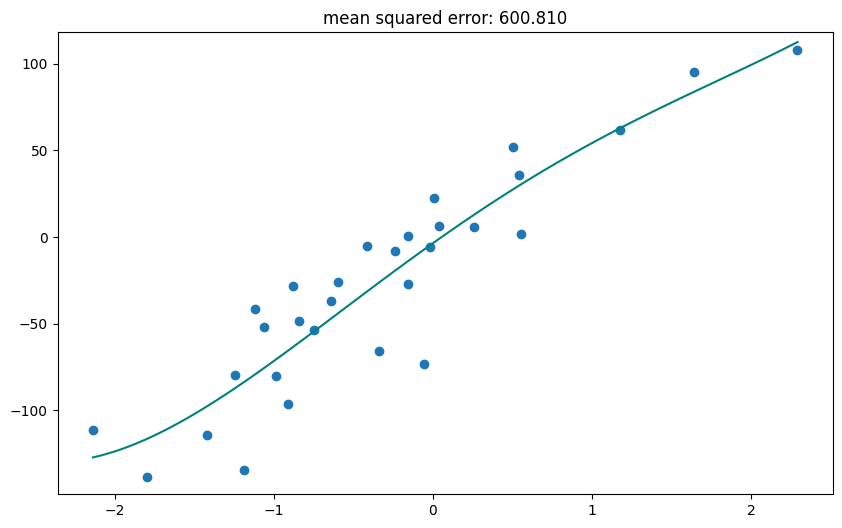

In [12]:
plot_poly(degree = 4)

This one looks better, the curve its following quite well all the points or considerably well.
The beginning maybe its slightly affected but those outsiders but its quite good

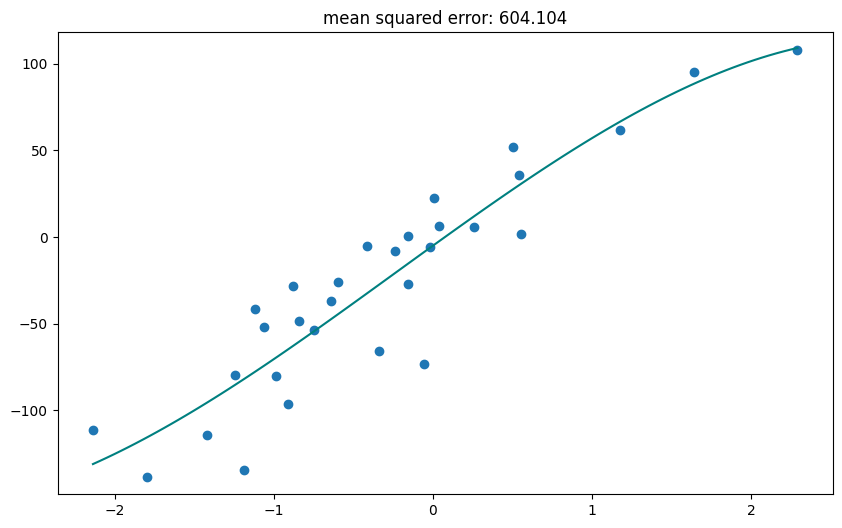

In [13]:
plot_poly(degree = 3)

This one looks very well.
I would say degree 3 fits well this model

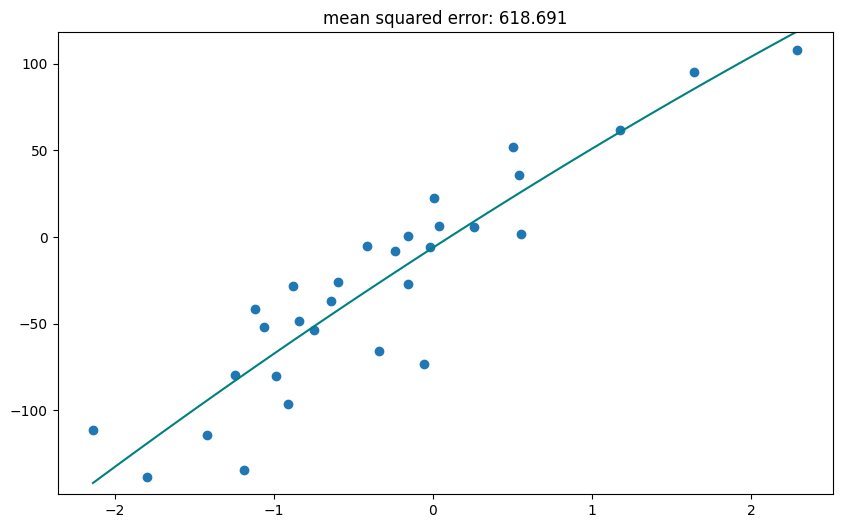

In [14]:
plot_poly(degree =2 )

## Imagine that your boss gave you these data-points as part of a housing dataset.

The task would be to find the function that best predicts new homes, that have never been sold before.

You can imagine that the x-axis is the size of the home, and the y-axis is the price of the home.  Just like I did in the class video.

Assuming this simple toy-world:
What degree of freedom would you choose for your final function?  Why?

Already answered above. I would choose degree 3.